<a href="https://colab.research.google.com/github/nixxby/predEqt/blob/main/ProjectX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
import csv
import pandas as pd
%matplotlib inline
!pip install --upgrade mplfinance
import mplfinance as mplf

     |████████████████████████████████| 62 kB 1.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/SBIN.NS.csv")

In [ ]:
df1= df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.0+ KB


/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


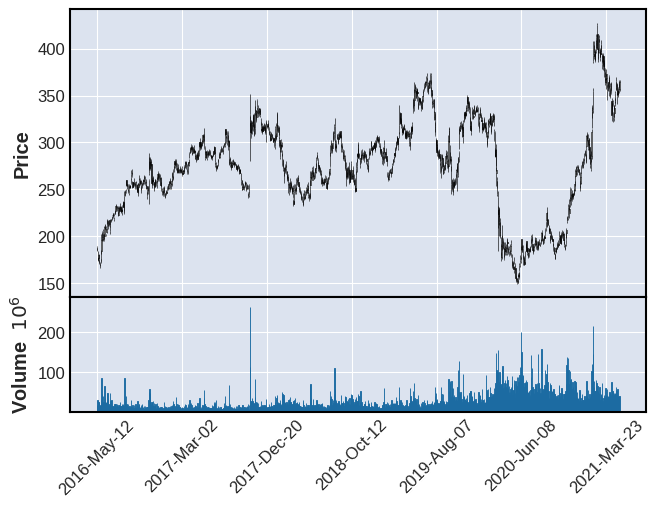

In [ ]:
# OHLC Candlestick chart visualization

#Converting 'Date' (object datatype) to datetime64[ns] & setting it as index for plotting OHLC.
df_ohlc = df1.copy()
df_ohlc.Date = pd.to_datetime(df1.Date)
df_ohlc = df_ohlc.set_index('Date')

#Plot candlestick graph for April-2021.
mplf.plot(df_ohlc, type='candle', volume=True)


In [ ]:
from sklearn.model_selection import train_test_split
training_set,test_set=train_test_split(df1,test_size=0.3,shuffle=False)

In [ ]:
df_train  = training_set.iloc[:,4:5]  #if considering only closing price for prediction. 
df_test   = test_set.iloc[:,4:5]      #if considering only closing price for prediction. 
m_train   = training_set.shape[0]
m_test    = test_set.shape[0]
print(m_train,",", m_test)

862 , 370


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_train)
training_set_scaled.size

862

In [ ]:
X_train = []
y_train = []
for i in range(60, m_train):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(802, 60, 1)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.add(Activation('linear'))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)
regressor.evaluate(X_train, y_train)

Epoch 1/200
26/26 [==============================] - 6s 17ms/step - loss: 0.0054 - accuracy: 0.0012
Epoch 2/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0051 - accuracy: 0.0021
Epoch 3/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 3.4493e-04
Epoch 4/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0035 - accuracy: 0.0045
Epoch 5/200
26/26 [==============================] - 0s 14ms/step - loss: 0.0059 - accuracy: 2.3721e-04
Epoch 6/200
26/26 [==============================] - 0s 14ms/step - loss: 0.0040 - accuracy: 0.0012
Epoch 7/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0042 - accuracy: 0.0045
Epoch 8/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 5.2802e-04
Epoch 9/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 3.4493e-04
Epoch 10/200
26/26 [==============================] - 0s 13ms/step - loss: 0.0038 - 

[0.0008611641824245453, 0.0012468828354030848]

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(df_test)
X_test = []
y_test = []
for i in range(60, m_test):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [ ]:
predicted = regressor.predict(X_test, batch_size=32)
predicted_stock_price = sc.inverse_transform(predicted)
y = sc.inverse_transform(y_test)

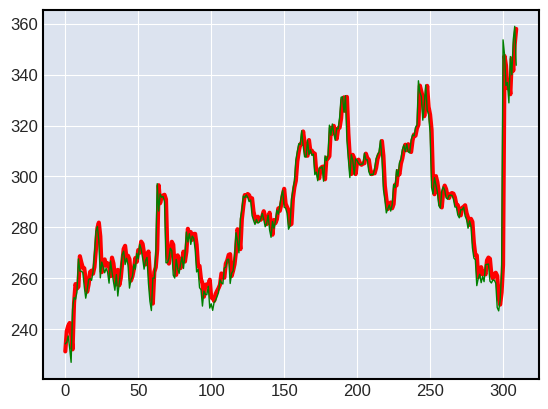

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predicted_stock_price, color = 'red', linewidth=3 )
plt.plot(y, color='green', linewidth=1)
plt.show()

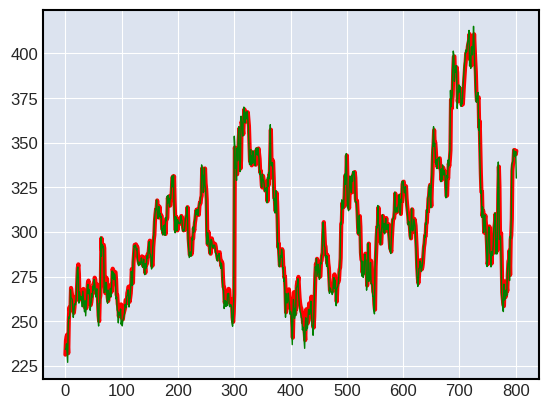

In [ ]:
predicted = regressor.predict(X_train, batch_size=32)
predicted_stock_price = sc.inverse_transform(predicted)
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y = sc.inverse_transform(y_train)
plt.plot(predicted_stock_price, color = 'red', linewidth=3 )
plt.plot(y, color='green', linewidth=1)
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y,predicted_stock_price))
rmse

7.757509466691328

In [ ]:
df = pd.read_csv("/content/drive/My Drive/INFY.NS.csv")
df1 = df.dropna()
df1.info()
infy_test  = df1.iloc[-62:-1,4:5]  #if considering only closing price for prediction. 

FileNotFoundError: ignored

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
tss = sc.fit_transform(infy_test)
X_test = []
y_test = []
for i in range(60, infy_test.shape[0]):
    X_test.append(tss[i-60:i, 0])
    y_test.append(tss[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
X_test.shape

NameError: ignored

In [ ]:
predicted = regressor.predict(X_test, batch_size=32)
predicted_stock_price = sc.inverse_transform(predicted)
y = sc.inverse_transform(y_test)
print(predicted_stock_price[0][0], " <> " , y[0][0])
# plt.plot(predicted_stock_price, color = 'red', linewidth=2, marker='x' )
# plt.plot(y, color='green', linewidth=1, marker='x')
# plt.show()

1389.196  <>  1389.650024


In [ ]:
!pip install yfinance
import yfinance as yf


     |████████████████████████████████| 6.3MB 25.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=7bf0573fe2bc4bbb3ac2044ab390d31fc279c97e61a5fce8c4e18604f36c845a
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
data=yf.download("SBIN.NS")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,12.848525,43733533
1996-01-02,18.894005,18.964767,17.738192,18.224106,12.439563,56167280
1996-01-03,18.327892,18.568489,17.643839,17.738192,12.107881,68296318
1996-01-04,17.502312,17.832542,17.223972,17.676863,12.066022,86073880
1996-01-05,17.738192,17.785366,17.459852,17.577793,11.998396,76613039
...,...,...,...,...,...,...
2021-06-04,437.500000,441.899994,431.750000,433.600006,433.600006,36898769
2021-06-07,435.100006,437.399994,430.799988,432.250000,432.250000,20201197
2021-06-08,432.250000,432.500000,424.000000,427.200012,427.200012,31113823
